## Combined Cycle Power Plant Data Set

Package imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings("ignore")

Get the Cycle Power Plant Data Set

In [3]:
cppdf = pd.read_excel('./data/CCPP/Folds5x2_pp.xlsx')
cppdf.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
cppdf.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

### EDA

In [5]:
shape_arr = cppdf.shape
print(f'No. of Rows : {shape_arr[0]}')
print(f'No. of Columns : {shape_arr[1]}')

No. of Rows : 9568
No. of Columns : 5


In the above mentioned dataset, we have <b>9568 rows and 5 columns</b>.
<br>
Columns represent the features of the power plant data which are as follows : <b>AMBIENT TEMPRATURE, VACCUM, AMBIENT PRESSURE, RELATIVE HUMIDITY, ENERGY OUTPUT per hour</b>.
<br>
Rows represent the <b>data</b> that has been collected from the power plant, rows basically have the <b>values of the thermodynamic variables</b> that can be used to calculate the final feature (PE).

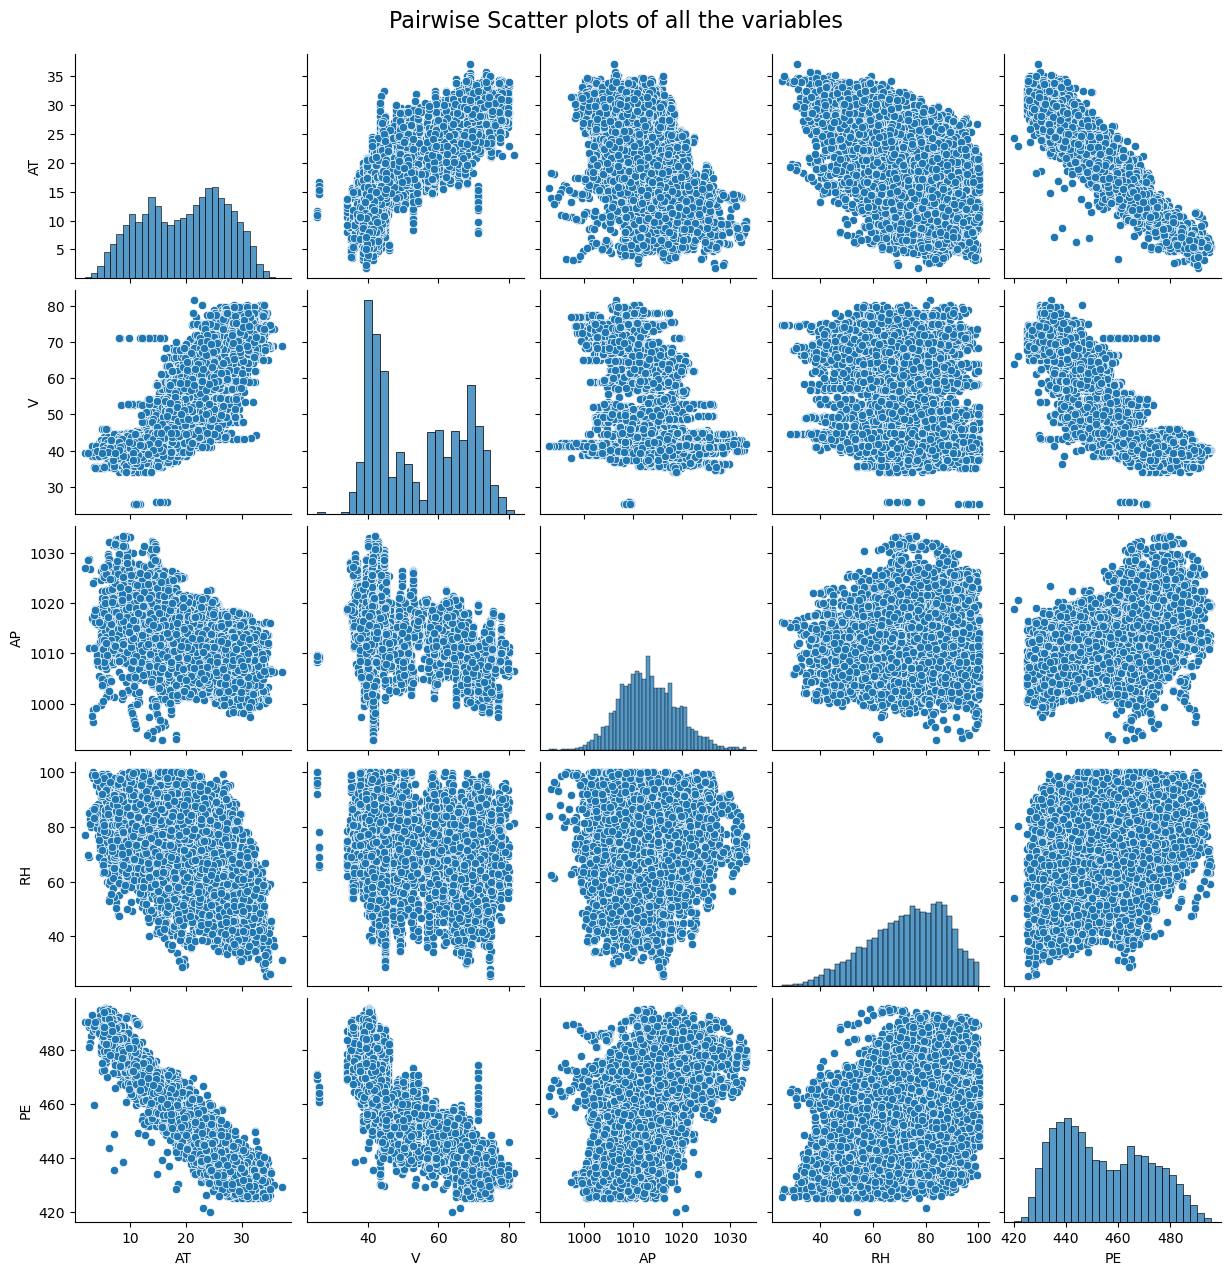

In [7]:
sns.pairplot(cppdf)
plt.suptitle('Pairwise Scatter plots of all the variables', y=1.02, fontsize = 16)
plt.show()

<b>Inferences from the Plots</b><br>
i. Ambient Temprature (AT) might be positively correlated to Ambient Vaccum (V), directly proportional, it has cases of outliers.<br>
ii. Ambient Temprature is a significant feature in determination of dependent variable that is Energy Output and as per the plot it is inversely proportional to it, so AT has negative correlation with PE. As the Ambient Temprature value increases the value of Output Energy decreases. It has a few scenarios of outliers which needs to be taken into consideration while modelling <br>
iii. Similar to AT, V is also inversely proportional to the predicting varibale, thus forming a negative correlation between the two, but in comparison of AT and V, V has a weaker correlation with PE<br>
iv. Rest all features that is Ambient Pressure (AP) and Relative Humidity (RH) in relation to PE are just randomly scattered thus forming weak correlation, might need to check the correlation map for precise values.

In [8]:
math_data = cppdf.describe()
final_math = math_data.loc[['mean','50%','min','max','25%','75%']]
iqrs = math_data.loc['75%']-math_data.loc['25%']
final_math.loc['IQR'] = iqrs
final_math.loc['Lower Bound'] = math_data.loc['25%'] - 1.5*(iqrs)
final_math.loc['Upper Bound'] = math_data.loc['75%'] + 1.5*(iqrs)
final_math.loc['Range'] = math_data.loc['max'] - math_data.loc['min']
final_math.rename({'mean':'Mean','50%':'Median','min':'Minimum Value','max':'Maximum Value','25%':'First Quartile (Q1)', '75%':'Third Quartile (Q3)'}, inplace=True)
final_math

,AT,V,AP,RH,PE
Mean,19.651231,54.305804,1013.259078,73.308978,454.365009
Median,20.345000,52.080000,1012.940000,74.975000,451.550000
Minimum Value,1.810000,25.360000,992.890000,25.560000,420.260000
Maximum Value,37.110000,81.560000,1033.300000,100.160000,495.760000
First Quartile (Q1),13.510000,41.740000,1009.100000,63.327500,439.750000
Third Quartile (Q3),25.720000,66.540000,1017.260000,84.830000,468.430000
IQR,12.210000,24.800000,8.160000,21.502500,28.680000
Lower Bound,-4.805000,4.540000,996.860000,31.073750,396.730000
Upper Bound,44.035000,103.740000,1029.500000,117.083750,511.450000
Range,35.300000,56.200000,40.410000,74.600000,75.500000


### Simple Linear Regression



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:52:27   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0

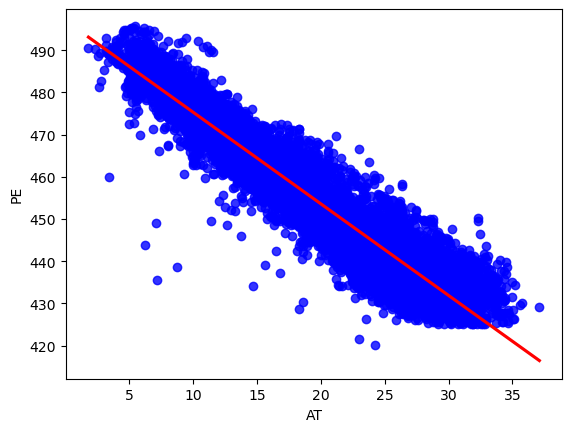



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:52:27   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0

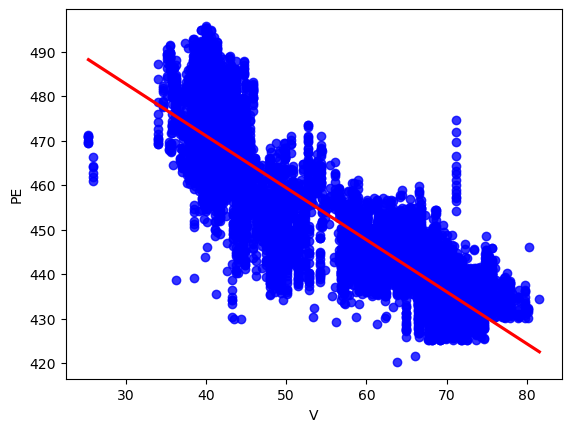



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:52:28   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0

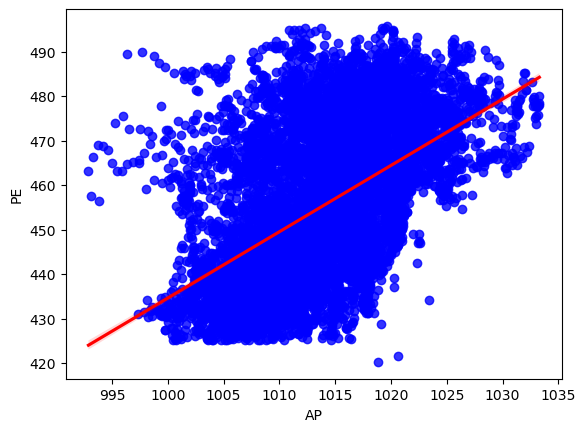



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:52:28   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0

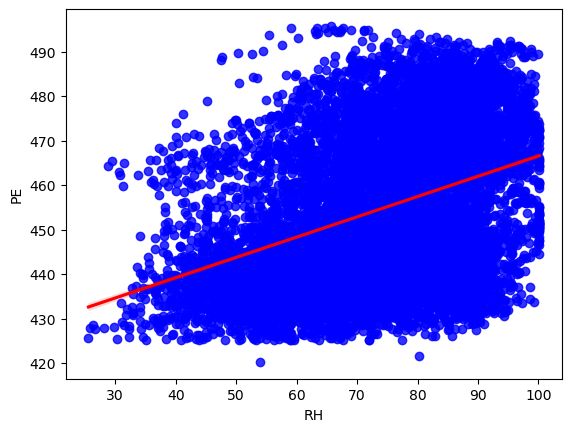

In [10]:
simp_coef = []
multi_coef = []

feature_columns = list(cppdf.columns)[:-1]
target_column = list(cppdf.columns)[-1]
for i in feature_columns:
    X = cppdf[[i]]
    y = cppdf[target_column]
    X = sm.add_constant(cppdf[i])
    model = sm.OLS(y,X).fit()
    print("\n")
    print(model.summary())
    print(f"\nFor independent variable - {i} below is the plot graph")
    sns.regplot(x=cppdf[i], y=y, color='blue', line_kws=dict(color='red'))
    plt.show()
    simp_coef.append(model.params[1])

From the above summary and plots, it can be inferred that all independent variables i.e AT, V, AP, and RH are stastically significant for determining PE.<br>
Since all the predictors in relation to target variable are having p-values 0.000 i.e less than 0.05<br>
<b>Significant Predictors : AT, V, AP, RH</b>

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 1.047e+05
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:52:52   Log-Likelihood:                -27302.
No. Observations:                9152   AIC:                         5.461e+04
Df Residuals:                    9150   BIC:                         5.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        498.0196      0.143   3471.047      0.0

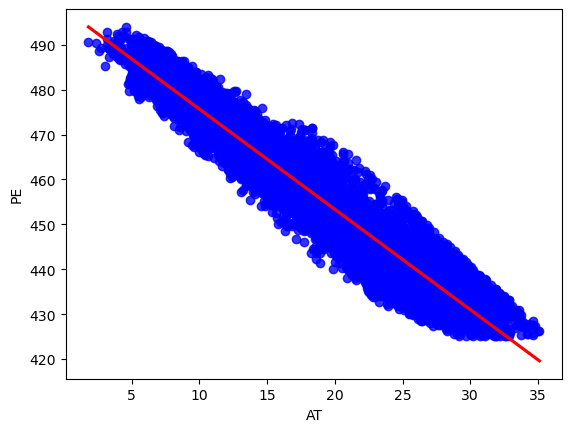

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 3.612e+04
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:52:53   Log-Likelihood:                -31275.
No. Observations:                9145   AIC:                         6.255e+04
Df Residuals:                    9143   BIC:                         6.257e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.4793      0.344   1502.660      0.0

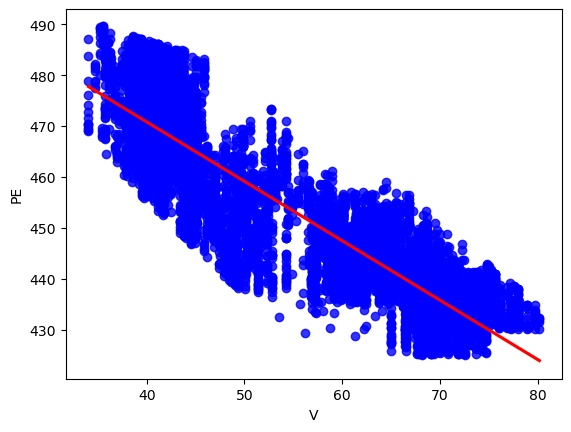

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     5234.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:52:53   Log-Likelihood:                -37219.
No. Observations:                9268   AIC:                         7.444e+04
Df Residuals:                    9266   BIC:                         7.446e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1334.8378     24.723    -53.992      0.0

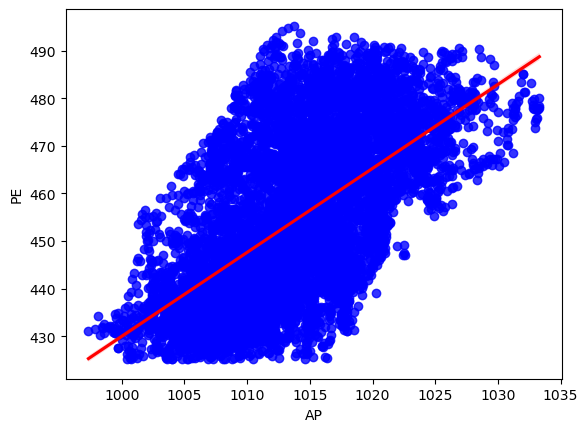

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     2277.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        16:52:54   Log-Likelihood:                -38536.
No. Observations:                9319   AIC:                         7.708e+04
Df Residuals:                    9317   BIC:                         7.709e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        415.5983      0.823    504.681      0.0

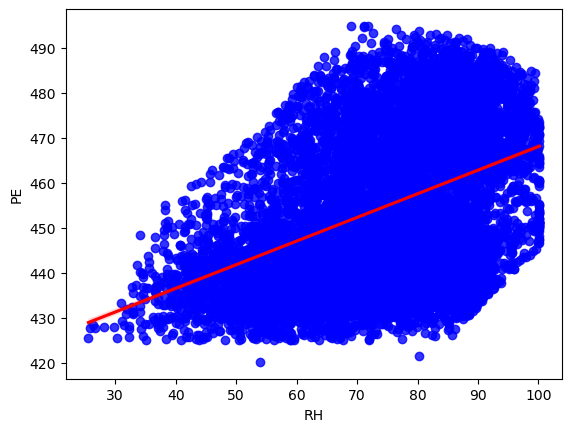

In [11]:
feature_columns = list(cppdf.columns)[:-1]
target_column = list(cppdf.columns)[-1]

for i in feature_columns:
    X = cppdf[[i]]
    y = cppdf[target_column]
    X = sm.add_constant(cppdf[i])
    model = sm.OLS(y, X).fit()
    influ = OLSInfluence(model)
    cooks_dist = influ.cooks_distance[0]
    outlier_cond = 4 / len(cppdf)
    outliers = np.where(cooks_dist>outlier_cond)[0]
    cppdf_outlier_df = cppdf.drop(index=outliers).reset_index(drop=True)

    X_new = cppdf_outlier_df[[i]]
    y_new = cppdf_outlier_df[target_column]
    X_new = sm.add_constant(X_new)
    model_new = sm.OLS(y_new, X_new).fit()
    print(model_new.summary())
    sns.regplot(x = cppdf_outlier_df[i], y = y_new, color='blue', line_kws=dict(color='red'))
    plt.show()
    
    

<b>For AT vs PE</b><br>
After removing the outliers R-Squared value increased from 0.899 to 0.920 which means the outlier were causing issue in fitting the model.<br>
<b>For V vs PE</b><br>
After removing the outliers R-Squared value increased from 0.757 to 0.798 which means the outlier were causing issue in fitting the model.<br>
<b>For AP vs PE</b><br>
After removing the outliers R-Squared value increased from 0.269 to 0.361 which means the outlier were causing issue in fitting the model.<br>
<b>For RH vs PE</b><br>
After removing the outliers R-Squared value increased from 0.152 to 0.196 which means the outlier were causing issue in fitting the model.<br>